In [ ]:
"""
Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The data set
contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of
Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of
10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable. Data
Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)Data Set :
https://www.kaggle.com/mohansacharya/graduate-admissions The counselor of the firm is supposed
check whether the student will get an admission or not based on his/her GRE score and Academic Score.
So to help the counselor to take appropriate decisions build a machine learning model classifier using
Decision tree to predict whether a student will get admission or not. 
Apply 
A. Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary. 
B. Perform data-preparation (Train-Test Split)
C. Apply Machine Learning Algorithm 
D. Evaluate Model.
"""

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [6]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
df.shape

(400, 9)

In [13]:
df.columns=df.columns.str.rstrip()

In [14]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [16]:
df.loc[df['Chance of Admit'] >=0.80, 'Chance of Admit']=1
df.loc[df['Chance of Admit'] < 0.80, 'Chance of Admit']=0

In [17]:
df['Chance of Admit']

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit, Length: 400, dtype: float64

In [18]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [25]:
df = df.drop('Serial No.',axis=1)

In [26]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1.0
396,325,107,3,3.0,3.5,9.11,1,1.0
397,330,116,4,5.0,4.5,9.45,1,1.0
398,312,103,3,3.5,4.0,8.78,0,0.0


In [29]:
X = df.iloc[ :,0:7].values

In [30]:
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [32]:
y = df.iloc[ :,7].values
y

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [84]:
X_train.shape

(300, 7)

In [85]:
y_train.shape

(300,)

In [86]:
print(X_train.shape,end='')
print(X_test.shape)

(300, 7)(100, 7)


In [87]:
model = DecisionTreeClassifier (criterion='entropy')
model.fit(X_train,y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [88]:
y_pred=model.predict(X_test)

In [145]:
matrix=confusion_matrix(y_test,y_pred,labels=[0.0,1.0])
matrix

array([[62,  9],
       [ 7, 22]])

<Axes: >

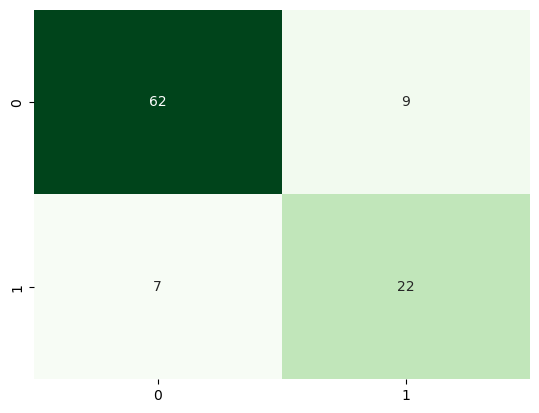

In [147]:
matrix
sns.heatmap(matrix,annot = True,fmt='g',cmap='Greens', cbar=False)

In [91]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy of Decision Tree Model =', acc)

Accuracy of Decision Tree Model = 0.84


In [92]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print('Classification Report ', cr)

Classification Report                precision    recall  f1-score   support

         0.0       0.90      0.87      0.89        71
         1.0       0.71      0.76      0.73        29

    accuracy                           0.84       100
   macro avg       0.80      0.82      0.81       100
weighted avg       0.84      0.84      0.84       100



In [93]:
feature_names = df.columns[0:7].tolist()
print(feature_names,end='')

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

In [94]:
class_names=[str(x) for x in model.classes_]
class_names

['0.0', '1.0']

In [95]:
from sklearn.tree import plot_tree


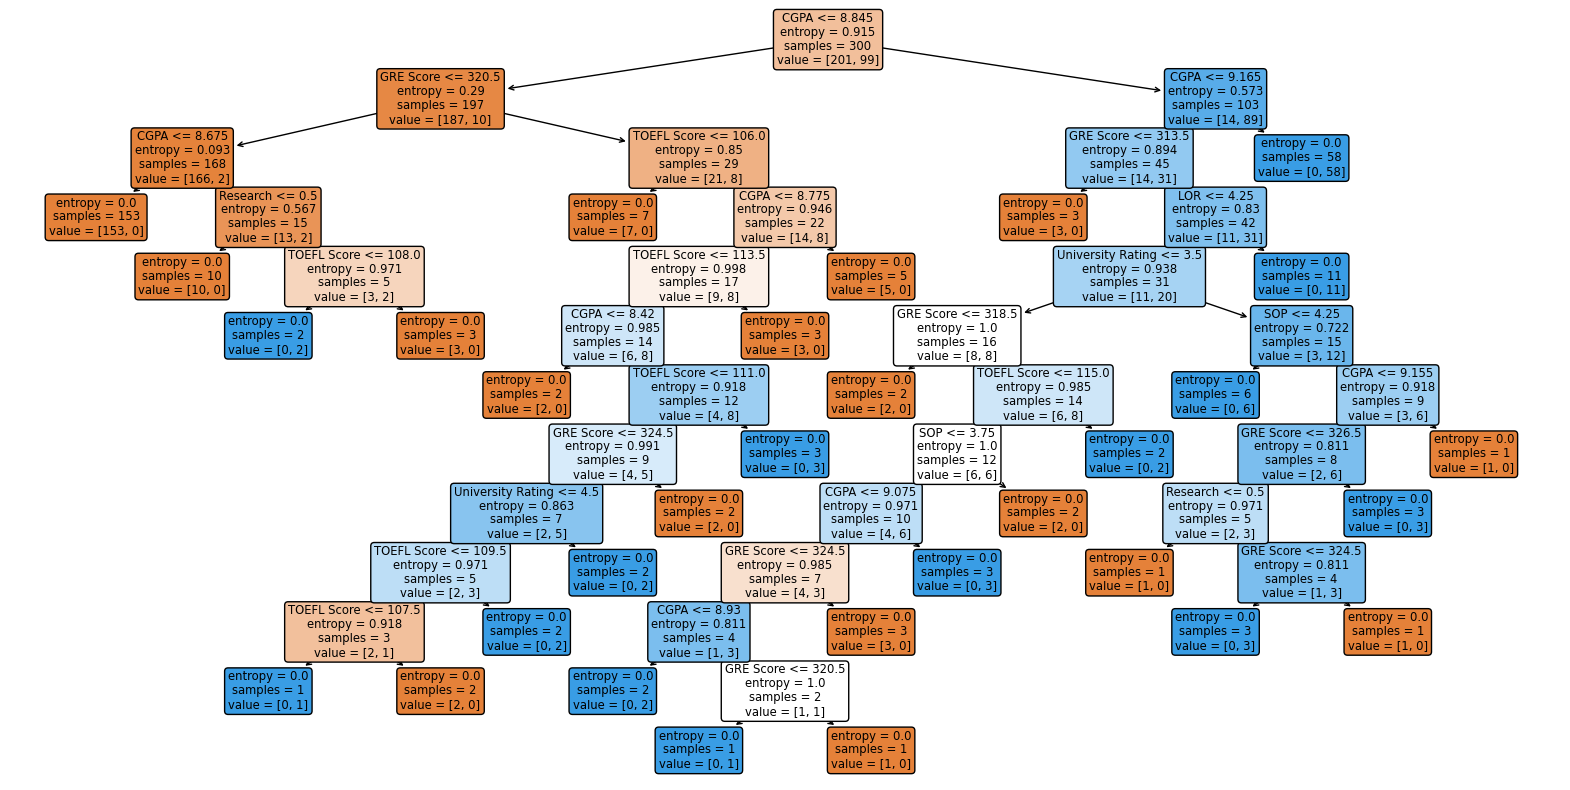

In [136]:
plt.figure(figsize=(20, 10))
# plot_tree(model, feature_names=feature_names, filled=True, rounded=True)
plot_tree(model, feature_names=feature_names, filled=True, rounded=True)
plt.savefig('Tree_visualization.png')
plt.show()

In [137]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

# Assuming your features are stored in a DataFrame called df
feature_names = df.columns[0:7].tolist()

# Generate DOT format data
dot_data = export_graphviz(model, out_file=None, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)

# Save DOT data to a file
with open("tree.dot", "w") as dot_file:
    dot_file.write(dot_data)

# Convert DOT file to a PNG image using Graphviz
graph = graphviz.Source(dot_data, format="png")
graph.render("tree_visualization1", format="png", cleanup=True)


'tree_visualization1.png'

In [114]:
dot_data=tree.export_graphviz(model,out_file=None,feature_names=feature_names,class_names=class_names,filled=True)

In [115]:
graph=graphviz.Source(dot_data,format='png')

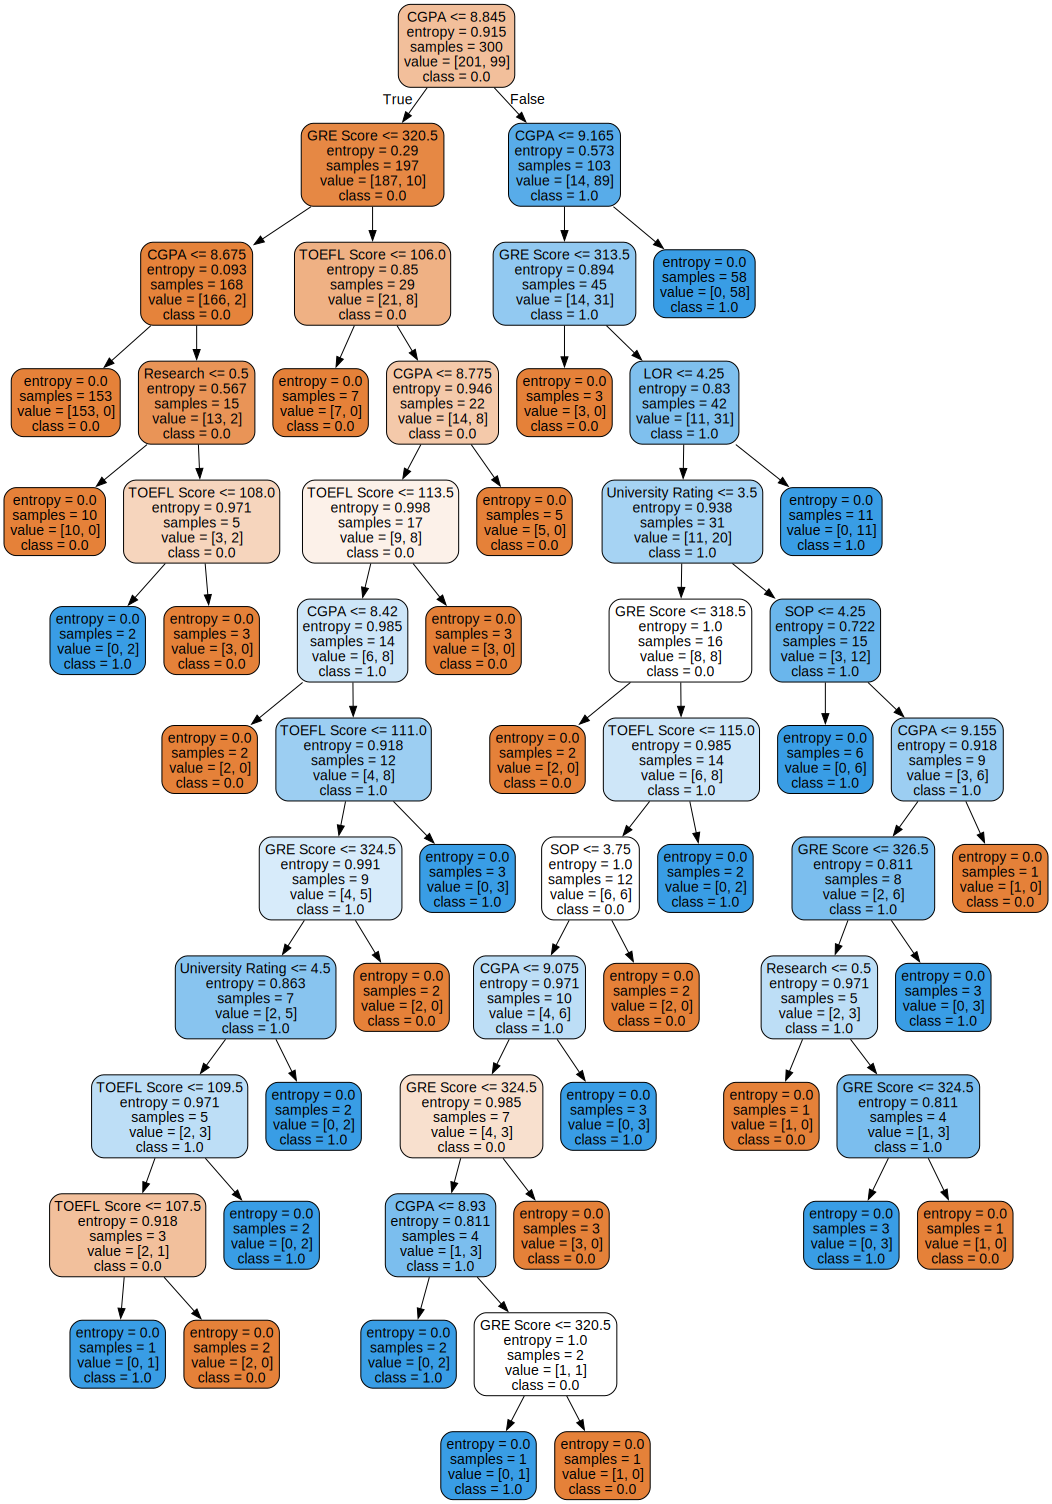

In [139]:
graph

In [118]:
sf= StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [129]:
depth=[1,2,3,4,5,6,7,8,9,10,11,12,13]

In [130]:
for d in depth:
    score=cross_val_score(tree.DecisionTreeClassifier(criterion='entropy',max_depth=d,random_state=0),X_train,y_train,cv=sf,scoring='accuracy')
    print('Average score for depth {} is : {}'.format(d,score.mean()))

Average score for depth 1 is : 0.9199999999999999
Average score for depth 2 is : 0.9199999999999999
Average score for depth 3 is : 0.9233333333333332
Average score for depth 4 is : 0.9033333333333333
Average score for depth 5 is : 0.8833333333333334
Average score for depth 6 is : 0.9
Average score for depth 7 is : 0.89
Average score for depth 8 is : 0.8866666666666667
Average score for depth 9 is : 0.9
Average score for depth 10 is : 0.9033333333333333
Average score for depth 11 is : 0.9033333333333333
Average score for depth 12 is : 0.9
Average score for depth 13 is : 0.9033333333333333


In [131]:
score.mean()

0.9033333333333333